In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [2]:
# Preprocessing steps as described in exercise 1
train_df = pd.read_csv("data/npf_train.csv")
train_df = train_df.set_index("date")
train_df = train_df.drop(["partlybad","id"],axis=1)

class2 = np.array(["event"]*train_df.shape[0],dtype="object") 
class2[train_df["class4"]=="nonevent"] = "nonevent" 
train_df.insert(1,'class2', class2)
train_df["class2"] = train_df["class2"].astype("category")
cleanup_nums = {"class4": {"nonevent": 0, "Ia": 1, "Ib": 2, "II": 3 }, 
                "class2": {"nonevent": 0, "event": 1 }}
train_df.replace(cleanup_nums, inplace=True)
train_df["logcs.mean"] = train_df["CS.mean"].apply(np.log)
train_df["logcs.std"] = train_df["CS.std"].apply(np.log)
train_df.head()

,class4,class2,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,...,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,logcs.mean,logcs.std
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0,0,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,383.885077,1.955198,...,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733,-5.691686,-7.218020
2000-01-20,0,0,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,374.674177,0.435480,...,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572,-6.501598,-7.466870
2000-01-23,0,0,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,0.165500,...,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048,-7.177553,-9.945550
2000-02-17,0,0,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,1.983430,...,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751,-6.195557,-7.194195
2000-03-25,2,1,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,1.004164,...,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210,-7.320064,-8.470636


In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
y = train_df['class2'].values #define target variable 
X = train_df.loc[:, ~train_df.columns.isin(['class4','class2'])] #define feature matrix
scaler = StandardScaler()
scaler.fit(X)
n_X = pd.DataFrame(scaler.transform(X),columns = train_df.columns.tolist()[2:104])
n_X.insert(0,'class2', y)
nonevent = n_X[n_X["class2"] == 0]
event = n_X[n_X["class2"] == 1]

In [4]:
def plot_point(X,y_lable,Support_vector_index,W,b):
    for i in range(np.shape(X)[0]):
        if y_lable[i] == 1:
            plt.scatter(X.iloc[i][0],X.iloc[i][1],c='b',s=20)
        else:
            plt.scatter(X.iloc[i][0],X.iloc[i][1],c='y',s=20)

    x = np.arange(-3,3,0.01)
    y = (W[0][0]*x+b)/(-1*W[0][1])
    plt.xlabel('Log of CS(condensation sink)')
    plt.ylabel('Relative Humidity(RHIRGA42.mean)')
    plt.title('Nonevents vs Events')
    plt.scatter(x,y,s=5,marker = 'h')

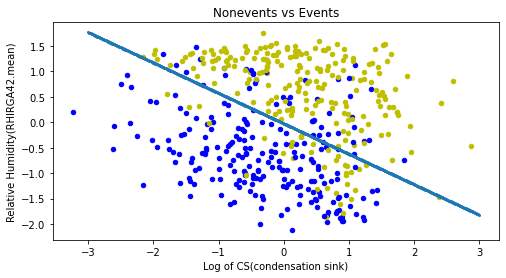

In [5]:
plt.figure(figsize=(8, 4))
if __name__ == "__main__":

    X,y_lable = n_X[['logcs.mean','RHIRGA42.mean']],n_X['class2']

    clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
    clf.fit(X, y_lable) 

    n_Support_vector = clf.n_support_ 
    Support_vector_index = clf.support_
    W = clf.coef_ 
    b =  clf.intercept_ 

    plot_point(X,y_lable,Support_vector_index,W,b)
plt.savefig('Fig/RHCS',dpi=1080)